<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [6]:
# Answer: 
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Check the data type of each column.

In [8]:
# Answer:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [9]:
# Answer:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [13]:
# Answer:
movies.sort_values(by=['duration']).head(5)

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."


In [14]:
movies.sort_values(by=['duration']).tail(5)

,star_rating,title,content_rating,genre,duration,actors_list
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

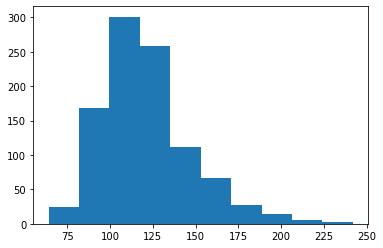

In [16]:
# Answer:
plt.hist(movies['duration']);

#### Use a box plot to display that same data.

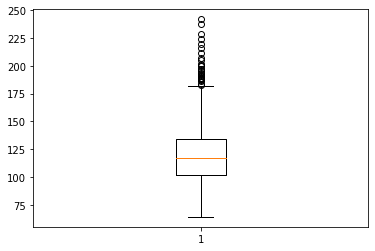

In [18]:
# Answer:
plt.boxplot(movies['duration']);

## Intermediate level

#### Count how many movies have each of the content ratings.

In [20]:
# Answer:
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

In [30]:
cr = pd.DataFrame(movies['content_rating'].value_counts()).reset_index()

In [32]:
cr

,index,content_rating
0,R,460
1,PG-13,189
2,PG,123
3,NOT RATED,65
4,APPROVED,47
5,UNRATED,38
6,G,32
7,PASSED,7
8,NC-17,7
9,X,4


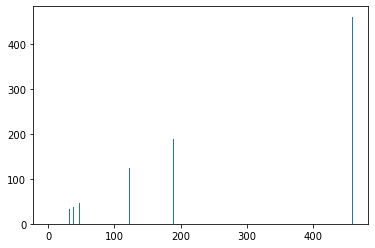

In [34]:
# Answer:
plt.bar(x=cr['content_rating'], height=cr['content_rating']);

# plt.bar(x= ['USA', 'CAN', 'MX'], height=[5,3,7], color=['red', 'orange', 'blue'])


#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [44]:
# Answer:
movies['new_content_rating'] = np.where(movies['content_rating'].isin(['NOT RATED', 'APPROVED', 'PASSED', 'GP']), 'UNRATED', movies['content_rating'])
         
         

In [48]:
movies[movies['content_rating'] == 'NOT RATED']

,star_rating,title,content_rating,genre,duration,actors_list,new_content_rating
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals...",UNRATED
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ...",UNRATED
41,8.5,Sunset Blvd.,NOT RATED,Drama,110,"[u'William Holden', u'Gloria Swanson', u'Erich...",UNRATED
63,8.4,M,NOT RATED,Crime,99,"[u'Peter Lorre', u'Ellen Widmann', u'Inge Land...",UNRATED
66,8.4,Munna Bhai M.B.B.S.,NOT RATED,Comedy,156,"[u'Sunil Dutt', u'Sanjay Dutt', u'Arshad Warsi']",UNRATED
...,...,...,...,...,...,...,...
665,7.7,Lolita,NOT RATED,Drama,152,"[u'James Mason', u'Shelley Winters', u'Sue Lyon']",UNRATED
673,7.7,Blow-Up,NOT RATED,Drama,111,"[u'David Hemmings', u'Vanessa Redgrave', u'Sar...",UNRATED
763,7.6,Hunger,NOT RATED,Biography,96,"[u'Stuart Graham', u'Laine Megaw', u'Brian Mil...",UNRATED
827,7.5,The Wind That Shakes the Barley,NOT RATED,Drama,127,"[u'Cillian Murphy', u'Padraic Delaney', u'Liam...",UNRATED


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [ ]:
# Answer:

#### Count the number of missing values in each column.

In [ ]:
# Answer:

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [ ]:
# Answer:

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [ ]:
# Answer:

#### Use a visualization to detect whether there is a relationship between duration and star rating.

In [ ]:
# Answer:

#### Calculate the average duration for each genre.

In [ ]:
# Answer:

## Advanced level

#### Visualize the relationship between content rating and duration.

In [ ]:
# Answer:

#### Determine the top rated movie (by star rating) for each genre.

In [ ]:
# Answer:

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [ ]:
# Answer:

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [ ]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!